<AxesSubplot:xlabel='Timestamp', ylabel='MON1 CL DDM'>

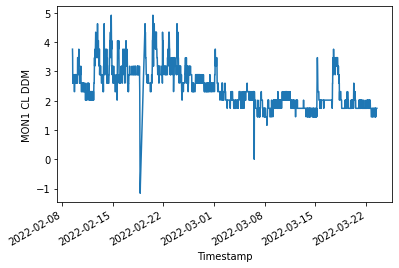

In [31]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np


#tf.config.run_functions_eagerly(True)

tf.data.experimental.enable_debug_mode()


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

csv_path = "FormattedData/train.csv"
df = pd.read_csv(csv_path)

#print(df)

df = df[5::6]

df.index = pd.to_datetime(df['Timestamp'], format='%Y-%m-%d %H:%M:%S')
df[:26]

temp = df['MON1 CL DDM (?A)']
temp.plot(xlabel = "Timestamp", ylabel = "MON1 CL DDM")





In [32]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

WINDOW_SIZE = 5
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape


X_train1, y_train1 = X1[:6500], y1[:6500]
#X_val1, y_val1 = X1[6500:9500], y1[6500:9500]
X_test1, y_test1 = X1[9500:], y1[9500:]
X_train1.shape, y_train1.shape, X_test1.shape, y_test1.shape

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 64)                16896     
                                                                 
 dense_16 (Dense)            (None, 8)                 520       
                                                                 
 dense_17 (Dense)            (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [35]:
#cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model1.fit(X_train1, y_train1, batch_size=64,epochs=10)

#model1 = load_model('model1/')

#train_predictions = model1.predict(X_train1).flatten()
#train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
#train_results

#val_predictions = model1.predict(X_val1).flatten()
#val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
#val_results

test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results


Epoch 1/10
31/31 [==============================] - 0s 15ms/step - loss: 0.8728 - root_mean_squared_error: 0.9342
Epoch 2/10
31/31 [==============================] - 0s 14ms/step - loss: 0.6963 - root_mean_squared_error: 0.8344
Epoch 3/10
31/31 [==============================] - 0s 15ms/step - loss: 0.5853 - root_mean_squared_error: 0.7651
Epoch 4/10
31/31 [==============================] - 0s 14ms/step - loss: 0.5132 - root_mean_squared_error: 0.7164
Epoch 5/10
31/31 [==============================] - 0s 15ms/step - loss: 0.4694 - root_mean_squared_error: 0.6851
Epoch 6/10
31/31 [==============================] - 0s 15ms/step - loss: 0.4418 - root_mean_squared_error: 0.6646
Epoch 7/10
31/31 [==============================] - 0s 15ms/step - loss: 0.4228 - root_mean_squared_error: 0.6502
Epoch 8/10
31/31 [==============================] - 0s 15ms/step - loss: 0.4070 - root_mean_squared_error: 0.6380
Epoch 9/10
31/31 [==============================] - 0s 15ms/step - loss: 0.3897 - root_m

ValueError: Unexpected result of `predict_function` (Empty batch_outputs). Please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.

Text(0, 0.5, 'MON1 CL DDM')

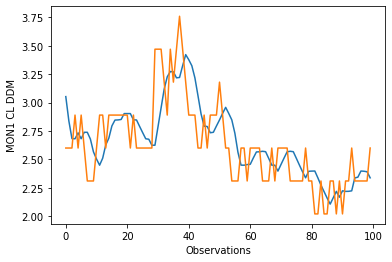

In [12]:
import matplotlib.pyplot as plt

plt.plot(train_results['Train Predictions'][:100])
plt.plot(train_results['Actuals'][:100])

plt.xlabel("Observations")
plt.ylabel("MON1 CL DDM")


ValueError: Unexpected result of `predict_function` (Empty batch_outputs). Please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.